In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

%matplotlib inline

# DATA_Visualization

In [2]:
sfvfg=pd.read_csv("test.csv",parse_dates=['timestamp'])

In [3]:
pd.read_csv("test.csv")

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,81,28,1,1,8,39,2,3,75,12
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,1,2,1,0,0,10,0,0,0,0
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,636,371,141,26,150,249,2,105,203,13
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,16,7,2,0,5,11,0,2,43,10


In [4]:
sfvfg.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [5]:
df_train= pd.read_csv("train.csv", parse_dates=['timestamp'])
mf=pd.read_csv("macro.csv",parse_dates=['timestamp'])

df_test=pd.read_csv("test.csv",parse_dates=['timestamp'])

In [6]:
test_df_mf=pd.merge(df_test,mf,how='left',on='timestamp')


In [7]:
df_train= pd.read_csv("train.csv", parse_dates=['timestamp'])
df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


# after merging both machro and train

In [8]:
df_mf_train=pd.merge(df_train,mf,how='left',on='timestamp')
df_mf_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


In [9]:
df_mf_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9


In [10]:
df_mf_train['state'].isna().sum()

13559

In [11]:
df_mf_train.loc[df_mf_train['cafe_count_500']==0,'cafe_sum_500_min_price_avg'].isna().sum()

12822

In [12]:
df_mf_train['cafe_sum_500_min_price_avg'].isna().sum()
13281-297

12984

#total we have 391 features 
#out of which 292 features are meata features for house and remaining 99 features are macro econmic features set

# How is price doc distributed ?

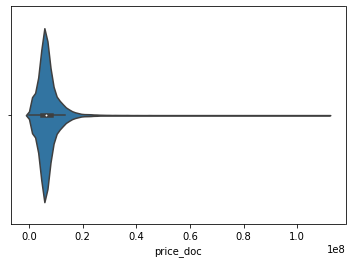

In [14]:
#sns.distplot(df['price_doc'],kde_kws={"cumulative":"TRUE","color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3,
                            #"alpha": 1, "color": "g"})
sns.violinplot((df_mf_train['price_doc']))

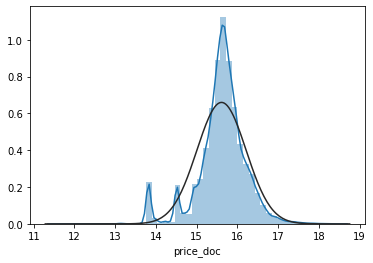

In [196]:
from scipy.stats import norm
ax = sns.distplot((np.log(df['price_doc'])), fit=norm, kde=True,hist=True)

## we are making prices log transform and it looks like it near log normal distribution

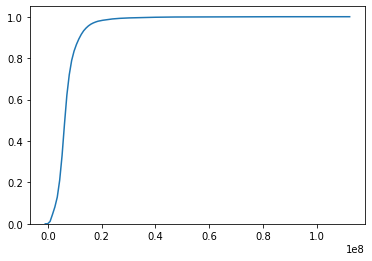

In [198]:
sns.distplot(df['price_doc'].values,kde_kws={"cumulative":"TRUE"})

# the price are not widely distributed they look almost tight bounded after log transform are in the range l4 amd 17

In [120]:
for i in range(90,100,1):
    var =df["price_doc"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,(var[int(len(var)*(float(i)/100))])))
print ("100 percentile value is ",(var[-1]))

90 percentile value is 11800000
91 percentile value is 12200000
92 percentile value is 12640380
93 percentile value is 13150000
94 percentile value is 13800000
95 percentile value is 14500000
96 percentile value is 15500000
97 percentile value is 16900000
98 percentile value is 19200000
99 percentile value is 24606918
100 percentile value is  111111112


In [123]:
19200000-16900000

2300000

In [122]:
24606918-19200000

5406918

In [124]:
for i in range(0,11,1):
    var =df["price_doc"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,(var[int(len(var)*(float(i)/100))])))
print ("10 percentile value is ",np.log(var[-1]))

0 percentile value is 100000
1 percentile value is 1000000
2 percentile value is 1000000
3 percentile value is 1000000
4 percentile value is 1628742
5 percentile value is 2000000
6 percentile value is 2000000
7 percentile value is 2134774
8 percentile value is 2552421
9 percentile value is 3000000
10 percentile value is 3000000
10 percentile value is  18.526041267610193


#16.88 could be the limiting point for outliers

# percentage of missing Values in the data

In [17]:
nul={}
for i in df_mf_train.columns:
    nl=(df_mf_train[i].isna().sum()/30471)*100
    if nl!=0:
        nul[i]=nl
        #print(i,":",nl)
nul_sort={k: v for k, v in sorted(nul.items(), key=lambda item: item[1])}
nul_sort

{'metro_min_walk': 0.08204522332709789,
 'metro_km_walk': 0.08204522332709789,
 'railroad_station_walk_km': 0.08204522332709789,
 'railroad_station_walk_min': 0.08204522332709789,
 'ID_railroad_station_walk': 0.08204522332709789,
 'floor': 0.548062091825014,
 'prom_part_5000': 0.584161990088937,
 'cafe_sum_5000_min_price_avg': 0.974697253125923,
 'cafe_sum_5000_max_price_avg': 0.974697253125923,
 'cafe_avg_price_5000': 0.974697253125923,
 'cafe_sum_3000_min_price_avg': 3.2522726526861603,
 'cafe_sum_3000_max_price_avg': 3.2522726526861603,
 'cafe_avg_price_3000': 3.2522726526861603,
 'cafe_sum_2000_min_price_avg': 5.6611204095697545,
 'cafe_sum_2000_max_price_avg': 5.6611204095697545,
 'cafe_avg_price_2000': 5.6611204095697545,
 'grp': 10.629779134258802,
 'grp_growth': 10.629779134258802,
 'real_dispos_income_per_cap_growth': 10.629779134258802,
 'profitable_enterpr_share': 10.629779134258802,
 'unprofitable_enterpr_share': 10.629779134258802,
 'share_own_revenues': 10.629779134258802

In [407]:
df['build_count_1971-1995']

0        206.0
1         84.0
2         63.0
3        130.0
4         62.0
         ...  
30466    246.0
30467     71.0
30468      NaN
30469     36.0
30470     66.0
Name: build_count_1971-1995, Length: 30471, dtype: float64

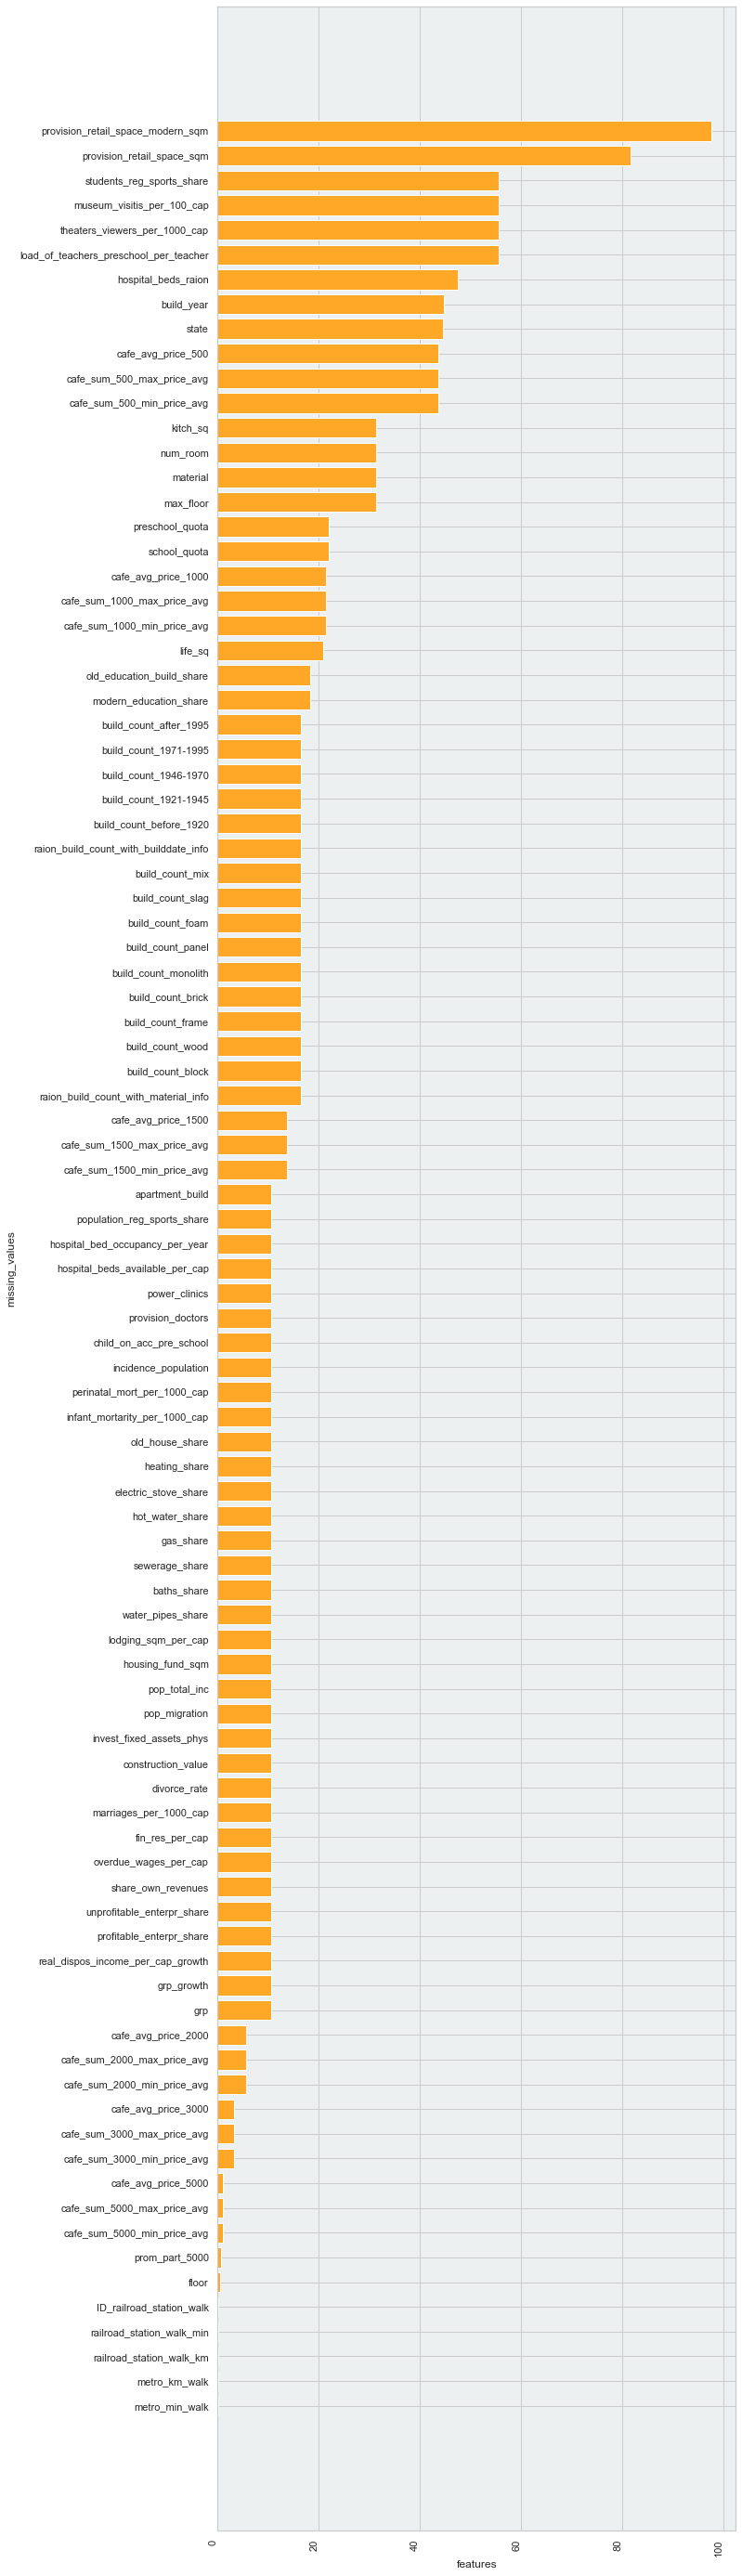

In [404]:
import numpy as np
nul={}
for i in df_mf_train.columns:
    nl=(df_mf_train[i].isna().sum()/30471)*100
    if nl!=0:
        nul[i]=nl
        #print(i,":",nl)
nul_sort={k: v for k, v in sorted(nul.items(), key=lambda item: item[1])}
x=nul_sort.keys()
y=nul_sort.values()
plt.figure(figsize=(10,50)) # Setting the figure size
ax = plt.axes()
ax.set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ind = np.arange(93)
bar=plt.barh(ind,y,color = '#FFA726')
plt.xlabel(r'features')
plt.ylabel(r'missing_values')
ax.set_yticks(ind)
ax.set_yticklabels(x, rotation='horizontal')
plt.xticks(rotation=90, horizontalalignment='right')
plt.show()


#total 93 missing features
#out of which 'provision_retail_space_modern_sqm','provision_retail_space_sqm' are most missing features in the whole data set
#state tell us about the conditon of the building
#train data file features  missing values are 51
#and remaining meta missing features are 42

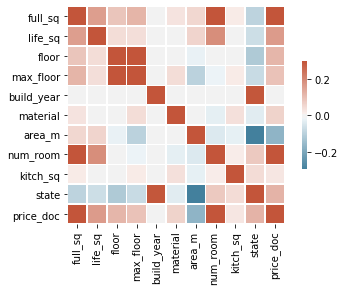

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

meta_chars=df_mf_train[['full_sq','life_sq','floor','max_floor','material','area_m','num_room','kitch_sq','state','price_doc']]

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(meta_chars.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

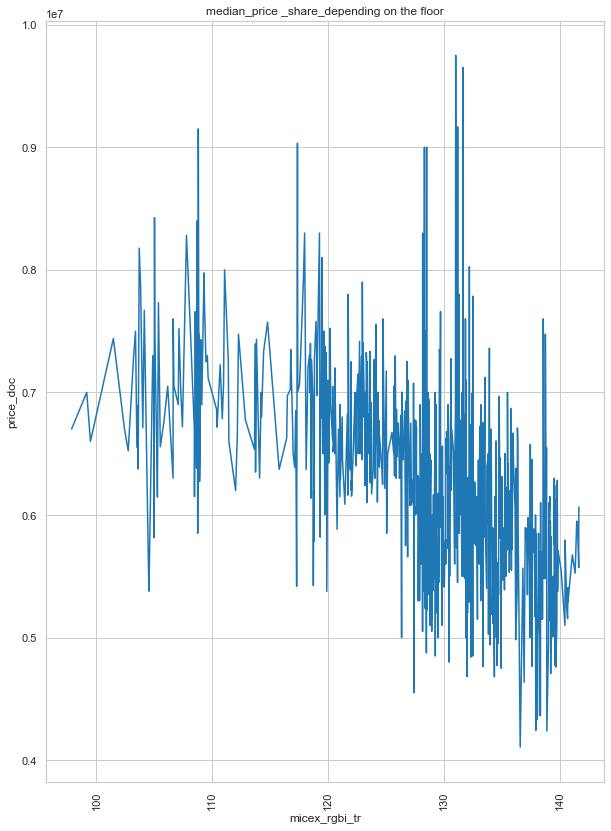

In [1104]:



sns.set_style('whitegrid')
sns.set_context('notebook') 
plt.figure(figsize=(10,14))

grouped_df = df.groupby('micex_rgbi_tr')['price_doc'].aggregate(np.median).reset_index()


    sns.lineplot( y='price_doc',x='micex_rgbi_tr',data=grouped_df)
plt.xticks(rotation='vertical')
plt.title("median_price _share_depending on the floor")
plt.show()





## we could see he full_sq and life_sq are highly corelated with respetive to other features muncipality area is neagtively corelated

## floor and MAX_FLOOR detailing and missing _values

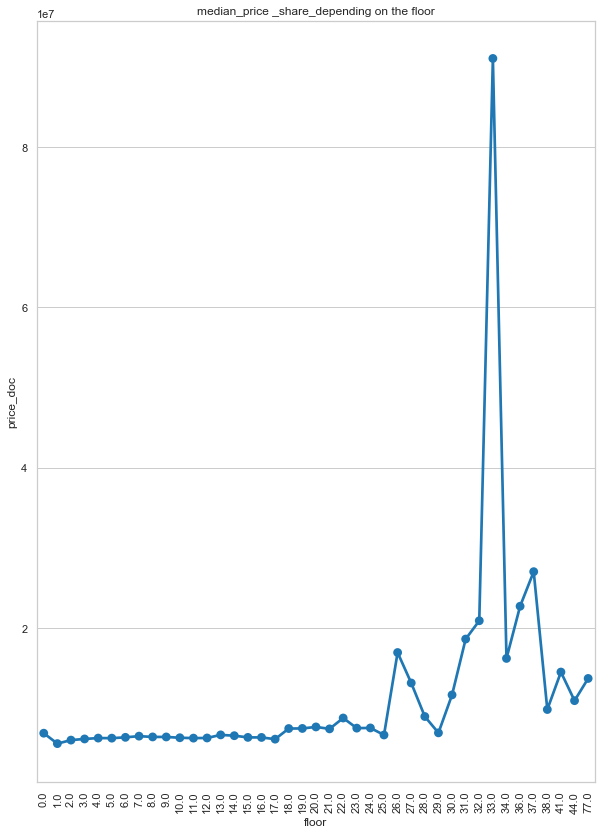

In [117]:



sns.set_style('whitegrid')
sns.set_context('notebook') 
plt.figure(figsize=(10,14))

grouped_df = df.groupby('floor')['price_doc'].aggregate(np.median).reset_index()


sns.pointplot( y='price_doc',x='floor',data=grouped_df)
plt.xticks(rotation='vertical')
plt.title("median_price _share_depending on the floor")
plt.show()





#the single store i.e ground floor houses are compartively high in price
#and the prices seems to after the 18 floor and need to see distibution of the floor in the next plot

Text(0.5, 1.0, 'dist_of_floor')

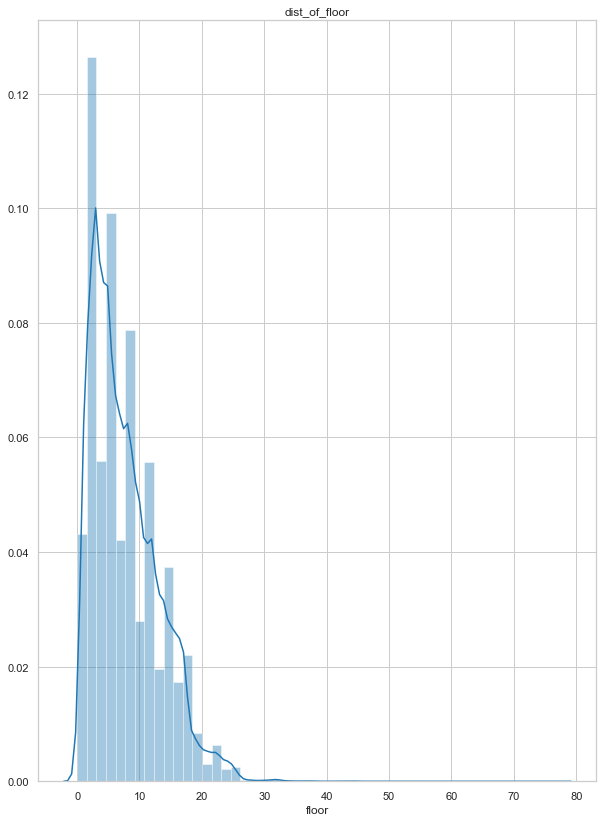

In [128]:



sns.set_style('whitegrid')
sns.set_context('notebook') 
plt.figure(figsize=(10,14))



sns.distplot(df['floor'])
plt.title('dist_of_floor')

#we could see the that most of floors are in a the range of 0 to 30
#beyond 29 the no of houses are vey less and prices steep only 41 houses present

In [138]:
df.loc[df['floor']>=29,'floor'].count()

41

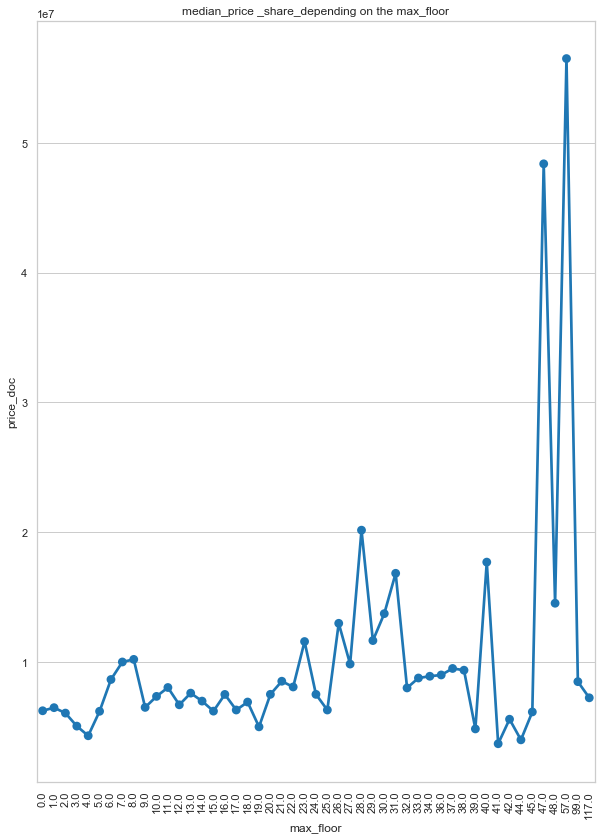

In [140]:
#similar thing we do for max_floor



sns.set_style('whitegrid')
sns.set_context('notebook') 
plt.figure(figsize=(10,14))

grouped_df = df.groupby('max_floor')['price_doc'].aggregate(np.median).reset_index()


sns.pointplot( y='price_doc',x='max_floor',data=grouped_df)
plt.xticks(rotation='vertical')
plt.title("median_price _share_depending on the max_floor")
plt.show()





#we could see heavy fluction and couldnt get any sense of the data
# we better cross check with the floor and max_floor

In [149]:
df.loc[df['max_floor']-df['floor']<0][['floor','max_floor']]

,floor,max_floor
8216,13.0,0.0
8268,3.0,1.0
8499,2.0,0.0
8531,7.0,0.0
8912,5.0,0.0
...,...,...
30398,5.0,1.0
30400,3.0,0.0
30426,1.0,0.0
30439,12.0,0.0


## DESCRIPTION OF CATEGORICAL FEATURES

In [965]:
# we have 15 categories features
dtype_df = df_mf_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,161
1,datetime64[ns],1
2,float64,210
3,object,15


In [961]:
mf_cat_feat=dtype_df[(dtype_df['Column Type'])=='object']['Count']
mf[mf_cat_feat]

,child_on_acc_pre_school,modern_education_share,old_education_build_share
0,"45,713",NaN,NaN
1,"45,713",NaN,NaN
2,"45,713",NaN,NaN
3,"45,713",NaN,NaN
4,"45,713",NaN,NaN
...,...,...,...
2479,NaN,NaN,NaN
2480,NaN,NaN,NaN
2481,NaN,NaN,NaN
2482,NaN,NaN,NaN


# we have 18 categorical features and remaining 372 continuous valuess

In [966]:
cat_feat=dtype_df[(dtype_df['Column Type'])=='object']['Count']

In [967]:
for col in df_mf_train[cat_feat]:
    print(col,"               ",len(df_mf_train[col].unique()),"labels")

product_type                 2 labels
sub_area                 146 labels
culture_objects_top_25                 2 labels
thermal_power_plant_raion                 2 labels
incineration_raion                 2 labels
oil_chemistry_raion                 2 labels
radiation_raion                 2 labels
railroad_terminal_raion                 2 labels
big_market_raion                 2 labels
nuclear_reactor_raion                 2 labels
detention_facility_raion                 2 labels
water_1line                 2 labels
big_road1_1line                 2 labels
railroad_1line                 2 labels
ecology                 5 labels


In [36]:
df_mf_train['modern_education_share'].value_counts()

93,08      13662
90,92       7978
95,4918     3239
Name: modern_education_share, dtype: int64

In [54]:
df_mf_train['child_on_acc_pre_school'].value_counts()

16,765    13662
3,013      7978
7,311      5592
Name: child_on_acc_pre_school, dtype: int64

In [38]:
df_mf_train['old_education_build_share'].value_counts()

25,47     13662
23,14      7978
8,2517     3239
Name: old_education_build_share, dtype: int64

# AREA OF DIFFERENT PARTS OF THE HOUSE, distributuions and there realtion with target, NUM OF ROOMS

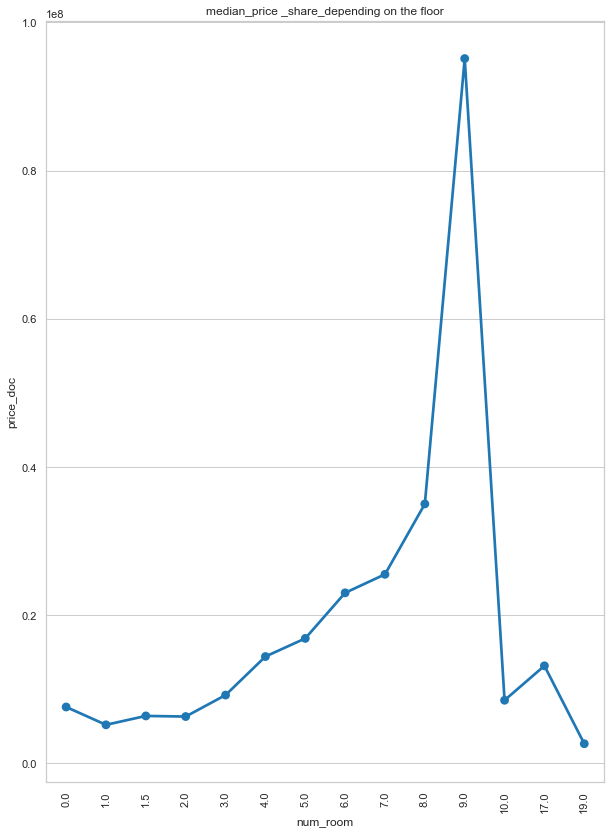

In [956]:



sns.set_style('whitegrid')
sns.set_context('notebook') 
plt.figure(figsize=(10,14))

grouped_df = df.groupby('num_room')['price_doc'].aggregate(np.median).reset_index()


sns.pointplot( y='price_doc',x='num_room',data=grouped_df)
plt.xticks(rotation='vertical')
plt.title("median_price _share_depending on the floor")
plt.show()





#the num_room seems to rise and reached top at 9th floor and tend to fall down at 10the and 17tth we need to see there prportion in the next plot

Text(0.5, 1.0, 'dist_of_floor')

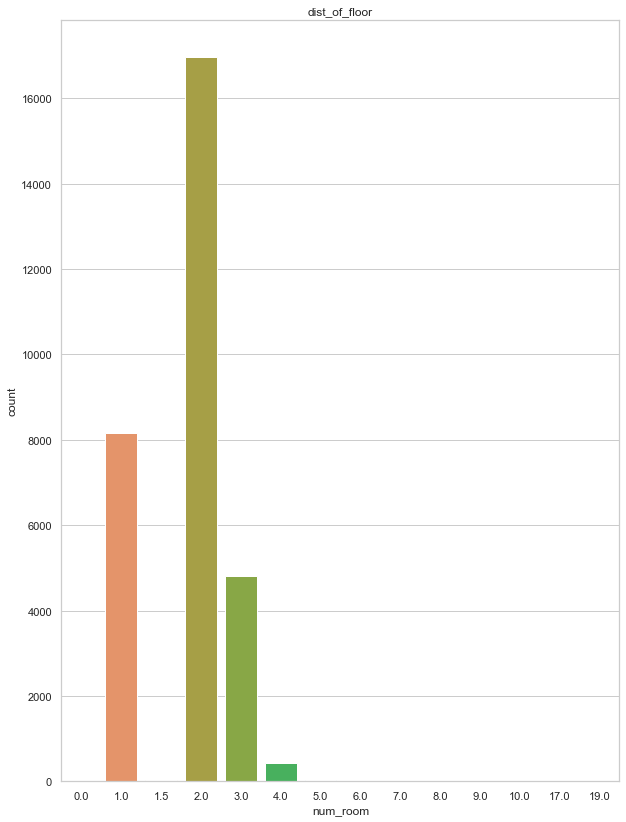

In [973]:
sns.set_style('whitegrid')
sns.set_context('notebook') 
plt.figure(figsize=(10,14))



sns.countplot(df['num_room'])
plt.title('dist_of_floor')

# so no need to worry about the large no of rooms as it may be outlier or exceptional

In [451]:
for i in range(90,100,1):
    var =df["full_sq"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,(var[int(len(var)*(float(i)/100))])))
print ("100 percentile value is ",(var[-1]))

90 percentile value is 78
91 percentile value is 79
92 percentile value is 80
93 percentile value is 82
94 percentile value is 83
95 percentile value is 85
96 percentile value is 89
97 percentile value is 96
98 percentile value is 103
99 percentile value is 120
100 percentile value is  637


In [456]:
for i in range(95,100,.1):
    print(i)


TypeError: 'float' object cannot be interpreted as an integer

In [460]:
for i in np.arange(0.0,1.0,0.1):
    var =df["full_sq"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,(var[int(len(var)*(float(99+i)/100))])))
print ("100 percentile value is ",(var[-1]))

99.0 percentile value is 120
99.1 percentile value is 122
99.2 percentile value is 125
99.3 percentile value is 130
99.4 percentile value is 134
99.5 percentile value is 137
99.6 percentile value is 142
99.7 percentile value is 156
99.8 percentile value is 166
99.9 percentile value is 179
100 percentile value is  637


In [461]:
for i in np.arange(0.0,1.0,0.1):
    var =df["full_sq"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(0+i,(var[int(len(var)*(float(0+i)/100))])))
print ("100 percentile value is ",(var[-1]))

0.0 percentile value is 0
0.1 percentile value is 11
0.2 percentile value is 15
0.30000000000000004 percentile value is 17
0.4 percentile value is 19
0.5 percentile value is 20
0.6000000000000001 percentile value is 22
0.7000000000000001 percentile value is 25
0.8 percentile value is 26
0.9 percentile value is 26
100 percentile value is  637


In [270]:
for i in range(0,10,1):
    var =df["full_sq"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,(var[int(len(var)*(float(i)/100))])))
print ("100 percentile value is ",(var[-1]))

0 percentile value is 0
1 percentile value is 27
2 percentile value is 29
3 percentile value is 30
4 percentile value is 31
5 percentile value is 31
6 percentile value is 32
7 percentile value is 32
8 percentile value is 32
9 percentile value is 33
100 percentile value is  637


In [318]:
df.loc[df.full_sq == 5326.0, 'full_sq'] = 53
df.loc[df.full_sq == 729.0, 'full_sq'] = 72

C:\Users\thrib\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'price_of_house')

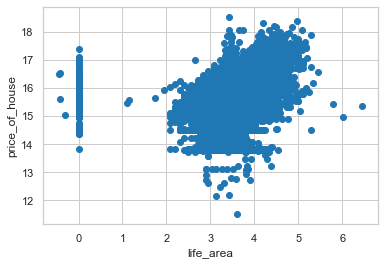

In [975]:
plt.scatter(x=(df.life_sq.values), y=np.log(df.price_doc.values))
plt.xlabel("life_area")
plt.ylabel("price_of_house")

In [976]:
#it seems to correlate well with the area

C:\Users\thrib\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'price_of_house')

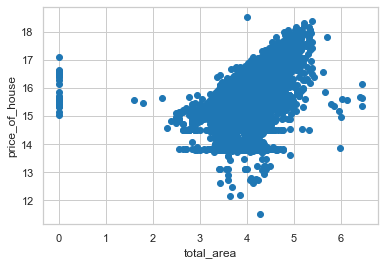

In [282]:
plt.scatter(x=np.log(df.full_sq.values), y=np.log(df.price_doc.values))
plt.xlabel("total_area")
plt.ylabel("price_of_house")

In [977]:
#it also seems to corellate more well than the life_area

In [94]:
#we could see that full_sq and total area are most important features as they are proprtional to full_sq

Text(0, 0.5, 'price_of_house')

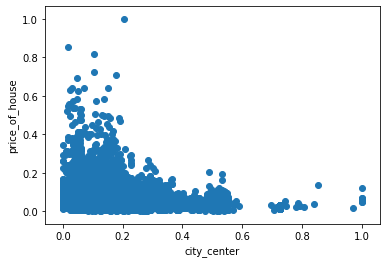

In [115]:
x=((df.kremlin_km.values)-df.kremlin_km.min(axis=0))/(df.kremlin_km.max(axis=0)-df.kremlin_km.min(axis=0))
y=((df.price_doc.values)-df.price_doc.min(axis=0))/(df.price_doc.max(axis=0)-df.price_doc.min(axis=0))
plt.scatter(x=x, y=y)
plt.xlabel("city_center")
plt.ylabel("price_of_house")


In [121]:
from scipy import stats
stats.spearmanr(df.kremlin_km.values,df.price_doc.values)

SpearmanrResult(correlation=-0.3242903312070893, pvalue=0.0)

In [168]:
#from spearman correlation we can conclude that city center is inversely proportinal values

In [109]:
x=(df.kremlin_km.values)-df.kremlin_km.mean()/df.kremlin_km.std()
y=(df.price_doc.values)-df.kremlin_km.mean()/df.kremlin_km.std()

In [105]:
df.price_doc.values

array([15.58195222, 15.60727003, 15.55597673, ..., 15.75726336,
       16.41820024, 15.53827716])

In [129]:
df.kremlin_km.std()

8.441964402701688

In [130]:
x=((df.kremlin_km.values)-df.kremlin_km.min(axis=0))/(df.kremlin_km.max(axis=0)-df.kremlin_km.min(axis=0))
y=((df.price_doc.values)-df.price_doc.min(axis=0))/(df.price_doc.max(axis=0)-df.price_doc.min(axis=0))

0        230310.0
1        230310.0
2        230310.0
3        230310.0
4        230310.0
           ...   
30466    234576.9
30467    234576.9
30468    234576.9
30469    234576.9
30470    234576.9
Name: apartment_fund_sqm, Length: 30471, dtype: float64

# BUILD_YEAR

In [343]:
df.loc[df['build_year'].isna(),'state'].count()

2361

In [344]:
df.loc[df['state'].isna(),'build_year'].count()

1411

In [950]:
#using max and min changed sum values
df.loc[df['build_year'] < 1700, 'build_year'] = np.nan
df.loc[df['build_year'] == 20052009.0, 'build_year'] = 2009
df.loc[df['build_year'] == 4965, 'build_year'] = 1965
df.loc[df.full_sq == 5326.0, 'full_sq'] = 53
df.loc[df.full_sq == 729.0, 'full_sq'] = 72

In [339]:
df['state'].isna().sum()

13559

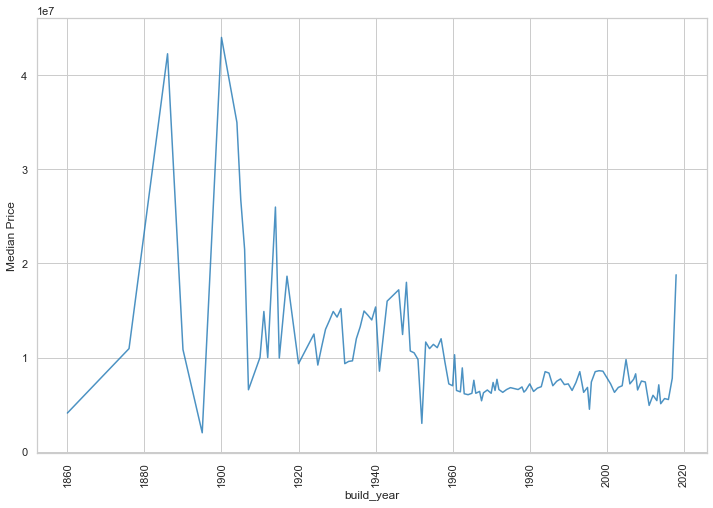

In [949]:
grouped_df = df.groupby('build_year')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(grouped_df.build_year.values, (grouped_df.price_doc.values), alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('build_year', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [350]:
df.loc[df['build_year']>2015,'build_year'].count()

530

# MATERIAL

In [381]:
df['material'].value_counts()

1.0    14197
8.0     9572
2.0     2993
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: material, dtype: int64

In [393]:
#0 as nan_values
df1=df
df1.loc[df1['material'].isna(),'material']=0
df1['material'].value_counts()

1.0    14197
0.0     9572
2.0     2993
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: material, dtype: int64

In [383]:
#we assume here 0 has nan_values


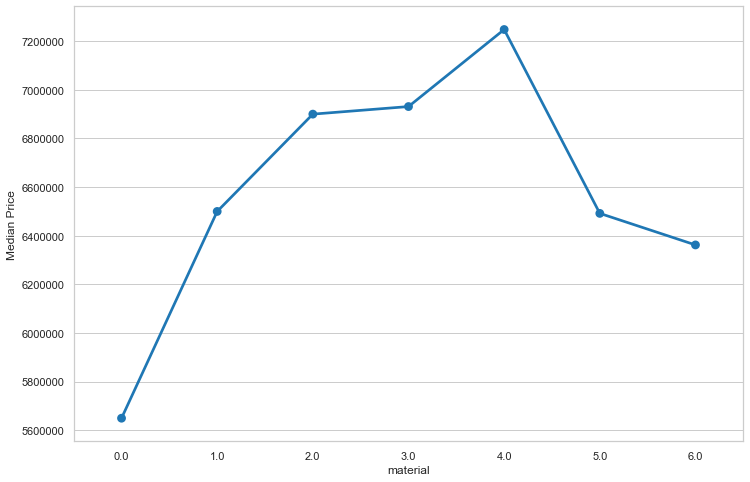

In [394]:
grouped_df = df.groupby('material')['price_doc'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.material.values, grouped_df.price_doc.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('material', fontsize=12)
plt.show()


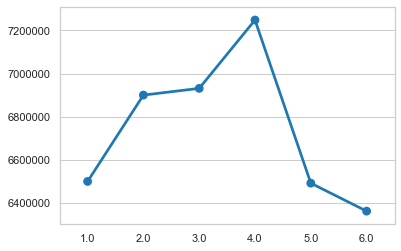

In [395]:
df1.loc[df1['material']==0,'material']=np.nan

grouped_df1 = df1.groupby('material')['price_doc'].aggregate(np.median).reset_index()

sns.pointplot(grouped_df1.material.values, grouped_df1.price_doc.values, alpha=0.8)


# Ecology zone of the area

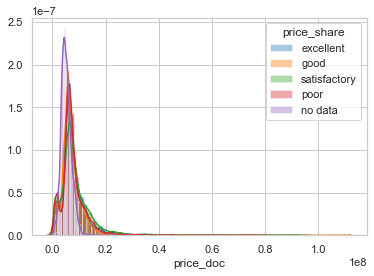

In [1022]:

x1=df.loc[df["ecology"]=='excellent','price_doc']
x2=df.loc[df["ecology"]=='good']['price_doc']
x3=df.loc[df["ecology"]=='satisfactory','price_doc']
x4=df.loc[df["ecology"]=='poor']['price_doc']
x5=df.loc[df["ecology"]=='no data','price_doc']


sns.distplot((x1))
sns.distplot((x2))
sns.distplot((x3))
sns.distplot((x4))
sns.distplot((x5))
plt.legend(title='price_share', loc='upper right', labels=['excellent', 'good','satisfactory','poor','no data'])
plt.show()


# population Feature of different age group

In [1098]:
from scipy import stats
stats.spearmanr(np.log(df.micex_rgbi_tr.values),np.log(df.price_doc.values))

SpearmanrResult(correlation=-0.15524560476864926, pvalue=8.021866324263324e-161)

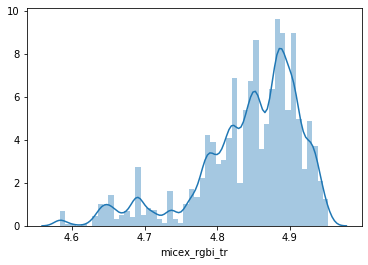

In [1100]:
sns.distplot(np.log(df['micex_rgbi_tr']))

In [946]:
pop_df=df.iloc[:,41:67]
pop_df['price_doc']=df.price_doc.values
#phi_k

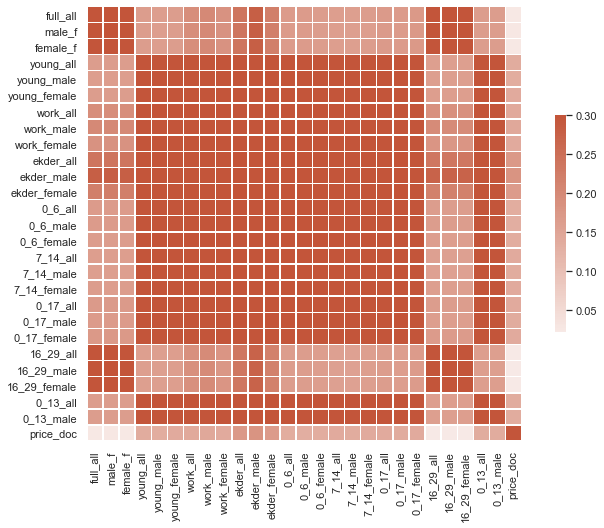

In [947]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(12,8))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pop_df.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#we coulde have minimum corelation between the features but it is always a positive corelation but there is also corelation between #the young_male to 0_17_fe-MALE which we need to drop many of the features here

#so by this the more the population the price may go up and the working employees may rise the bar of the male people.

# Distance to various Place Features

In [593]:
dis_df=df.iloc[:,85:152]
dis_df['price_doc']=df.price_doc.values

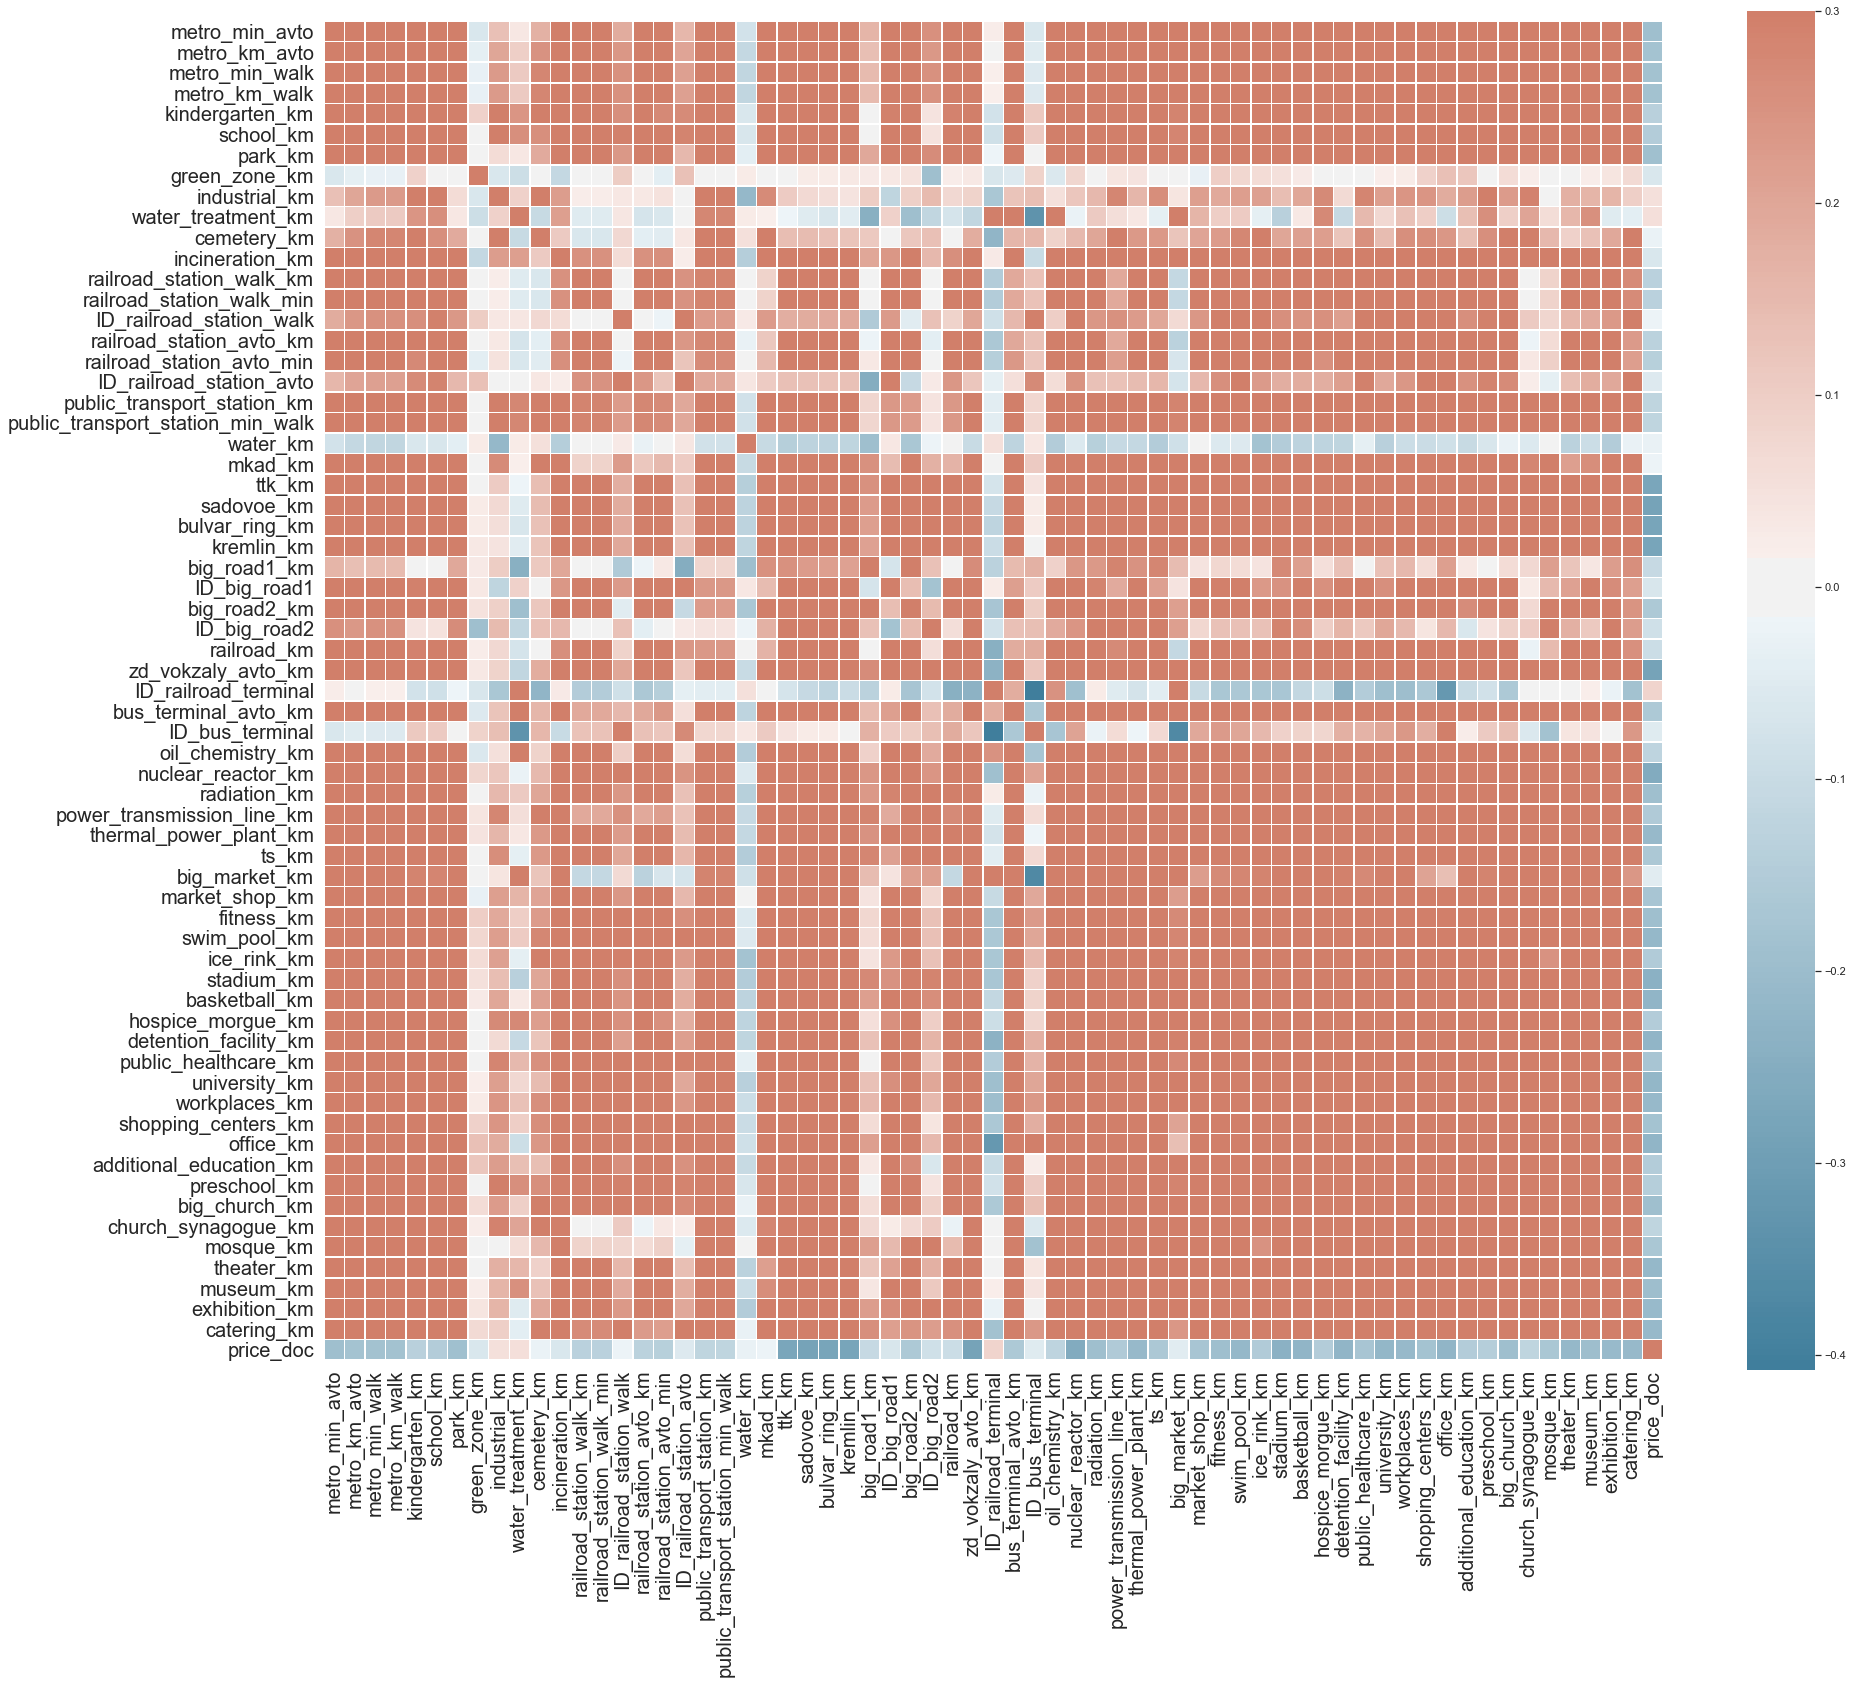

In [599]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(30,50))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dis_df.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.show()


#as we coulde see some of the features are neagtivley corelated that could be with respect to the INDUSTRIES, FACTORIES 
which are located far away

#and some of the city attractions nearby roads, railways,cafes are could be postively corelated with itself may be some of them should be removed


#many of this features are higly corelated between them

In [591]:

#x=['oil_urals','gdp_quart','gdp_quart_growth','cpi','ppi','gdp_deflator','balance_trade','balance_trade_growth','usdrub','eurrub','brent','gdp_annual','gdp_annual_growth']
y='price_doc'
dis_df=df.iloc[:,85:152]
dis_df['price_doc']=df.price_doc.values
from scipy import stats
for i in dis_df.columns[1:]:
    print(i,":",stats.spearmanr(df[i],df[y])[0])

metro_km_avto : -0.3048429995924587
metro_min_walk : nan
metro_km_walk : nan
kindergarten_km : -0.1710434743870334
school_km : -0.18511581647316883
park_km : -0.25427966971157356
green_zone_km : -0.023454050789096962
industrial_km : 0.05579720021345154
water_treatment_km : 0.09554992943623337
cemetery_km : -0.016382856927167885
incineration_km : -0.07115685454871812
railroad_station_walk_km : nan
railroad_station_walk_min : nan
ID_railroad_station_walk : nan
railroad_station_avto_km : -0.12322959107247335
railroad_station_avto_min : -0.1343263962545032
ID_railroad_station_avto : -0.10014477647125182
public_transport_station_km : -0.17237001088881
public_transport_station_min_walk : -0.17236999652172144
water_km : -0.02347560567305415
water_1line : -0.06339695016298307
mkad_km : -0.059240206110258035
ttk_km : -0.32805774592959047
sadovoe_km : -0.3246539986615955
bulvar_ring_km : -0.3189254941749397
kremlin_km : -0.3242903312070893
big_road1_km : -0.10745689412367437
ID_big_road1 : -0.09

In [446]:
dis_df.isna().sum

Index(['metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk',
       'kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
       'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
       'railroad_station_walk_km', 'railroad_station_walk_min',
       'ID_railroad_station_walk', 'railroad_station_avto_km',
       'railroad_station_avto_min', 'ID_railroad_station_avto',
       'public_transport_station_km', 'public_transport_station_min_walk',
       'water_km', 'water_1line', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_road1_km', 'ID_big_road1',
       'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km',
       'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
       'bus_terminal_avto_km', 'ID_bus_terminal', 'oil_chemistry_km',
       'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km',
       'thermal_power_plant_km', 'ts_km', 'big_market_km', 'market_shop_km',
    

In [176]:
ament_df=df.iloc[:,153:292]

In [177]:
ament_df.isna().sum().values

array([    0,     0,     0,     0,     0,     0,     0, 13281, 13281,
       13281,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,  6524,  6524,  6524,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,  4199,
        4199,  4199,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,  1725,  1725,  1725,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
         991,   991,   991,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,   178,
           0,     0,     0,     0,     0,   297,   297,   297,     0,
           0,     0,

In [181]:
ament_df.corr()

,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
green_part_500,1.000000,-0.141482,-0.110919,-0.110285,-0.123546,-0.053031,-0.078615,0.058938,0.069125,0.065316,...,-0.114551,-0.101436,-0.090961,-0.128942,-0.131204,-0.133247,-0.117551,-0.219786,-0.228324,-0.054191
prom_part_500,-0.141482,1.000000,-0.009536,0.101762,-0.085876,-0.057981,-0.095104,-0.013334,-0.008202,-0.010251,...,-0.028829,-0.034997,-0.030852,-0.027861,-0.026178,-0.006150,-0.033633,0.061107,0.103248,-0.009009
office_count_500,-0.110919,-0.009536,1.000000,0.759324,0.487496,0.513976,0.826531,0.109510,0.101019,0.104671,...,0.834149,0.827679,0.806576,0.818389,0.822379,0.435305,0.833665,0.658175,0.349431,0.185109
office_sqm_500,-0.110285,0.101762,0.759324,1.000000,0.379581,0.406545,0.576775,0.046665,0.038864,0.042057,...,0.607124,0.599005,0.581820,0.588775,0.593417,0.321370,0.602991,0.514467,0.323157,0.133220
trc_count_500,-0.123546,-0.085876,0.487496,0.379581,1.000000,0.752823,0.653692,-0.013175,-0.018102,-0.016213,...,0.482027,0.469385,0.450347,0.497492,0.491164,0.278463,0.477994,0.410127,0.276633,0.063832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,-0.133247,-0.006150,0.435305,0.321370,0.278463,0.315739,0.464359,0.081478,0.074101,0.077233,...,0.529434,0.492859,0.481481,0.502028,0.550342,1.000000,0.499376,0.518500,0.242078,0.175107
leisure_count_5000,-0.117551,-0.033633,0.833665,0.602991,0.477994,0.555476,0.839664,0.159247,0.152199,0.155436,...,0.986206,0.975462,0.948391,0.969029,0.975259,0.499376,1.000000,0.809169,0.463053,0.200448
sport_count_5000,-0.219786,0.061107,0.658175,0.514467,0.410127,0.433752,0.648122,0.069854,0.066802,0.068207,...,0.824139,0.778770,0.753384,0.825883,0.847771,0.518500,0.809169,1.000000,0.733897,0.294864
market_count_5000,-0.228324,0.103248,0.349431,0.323157,0.276633,0.235848,0.338515,-0.120815,-0.125328,-0.123926,...,0.432265,0.380154,0.353270,0.482547,0.514344,0.242078,0.463053,0.733897,1.000000,0.194021


In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="sub_area", data=df_train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('sub_area', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [249]:
df['product_type'].value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

## PRICE SHARE OF VARIOUS CATEGORIES

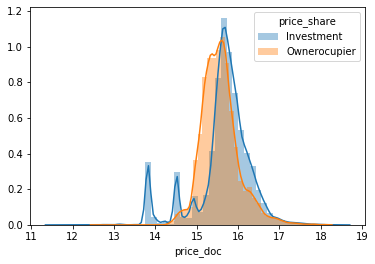

In [245]:
x_p=df.loc[df['product_type']=='Investment']['price_doc']
x_i=df.loc[df['product_type']!='Investment','price_doc']
sns.distplot(np.log(x_p))
sns.distplot(np.log(x_i))
plt.legend(title='price_share', loc='upper right', labels=['Investment', 'Ownerocupier'])
plt.show()


#it is not perfectly differnitable but they is some variance between two types owner occupied are compartevely less
#so it is better to create seperate models

In [ ]:
sub_area={k: v for k, v in sorted(sub_dict.items(), key=lambda item: item[1],reverse=True)}
sub_area

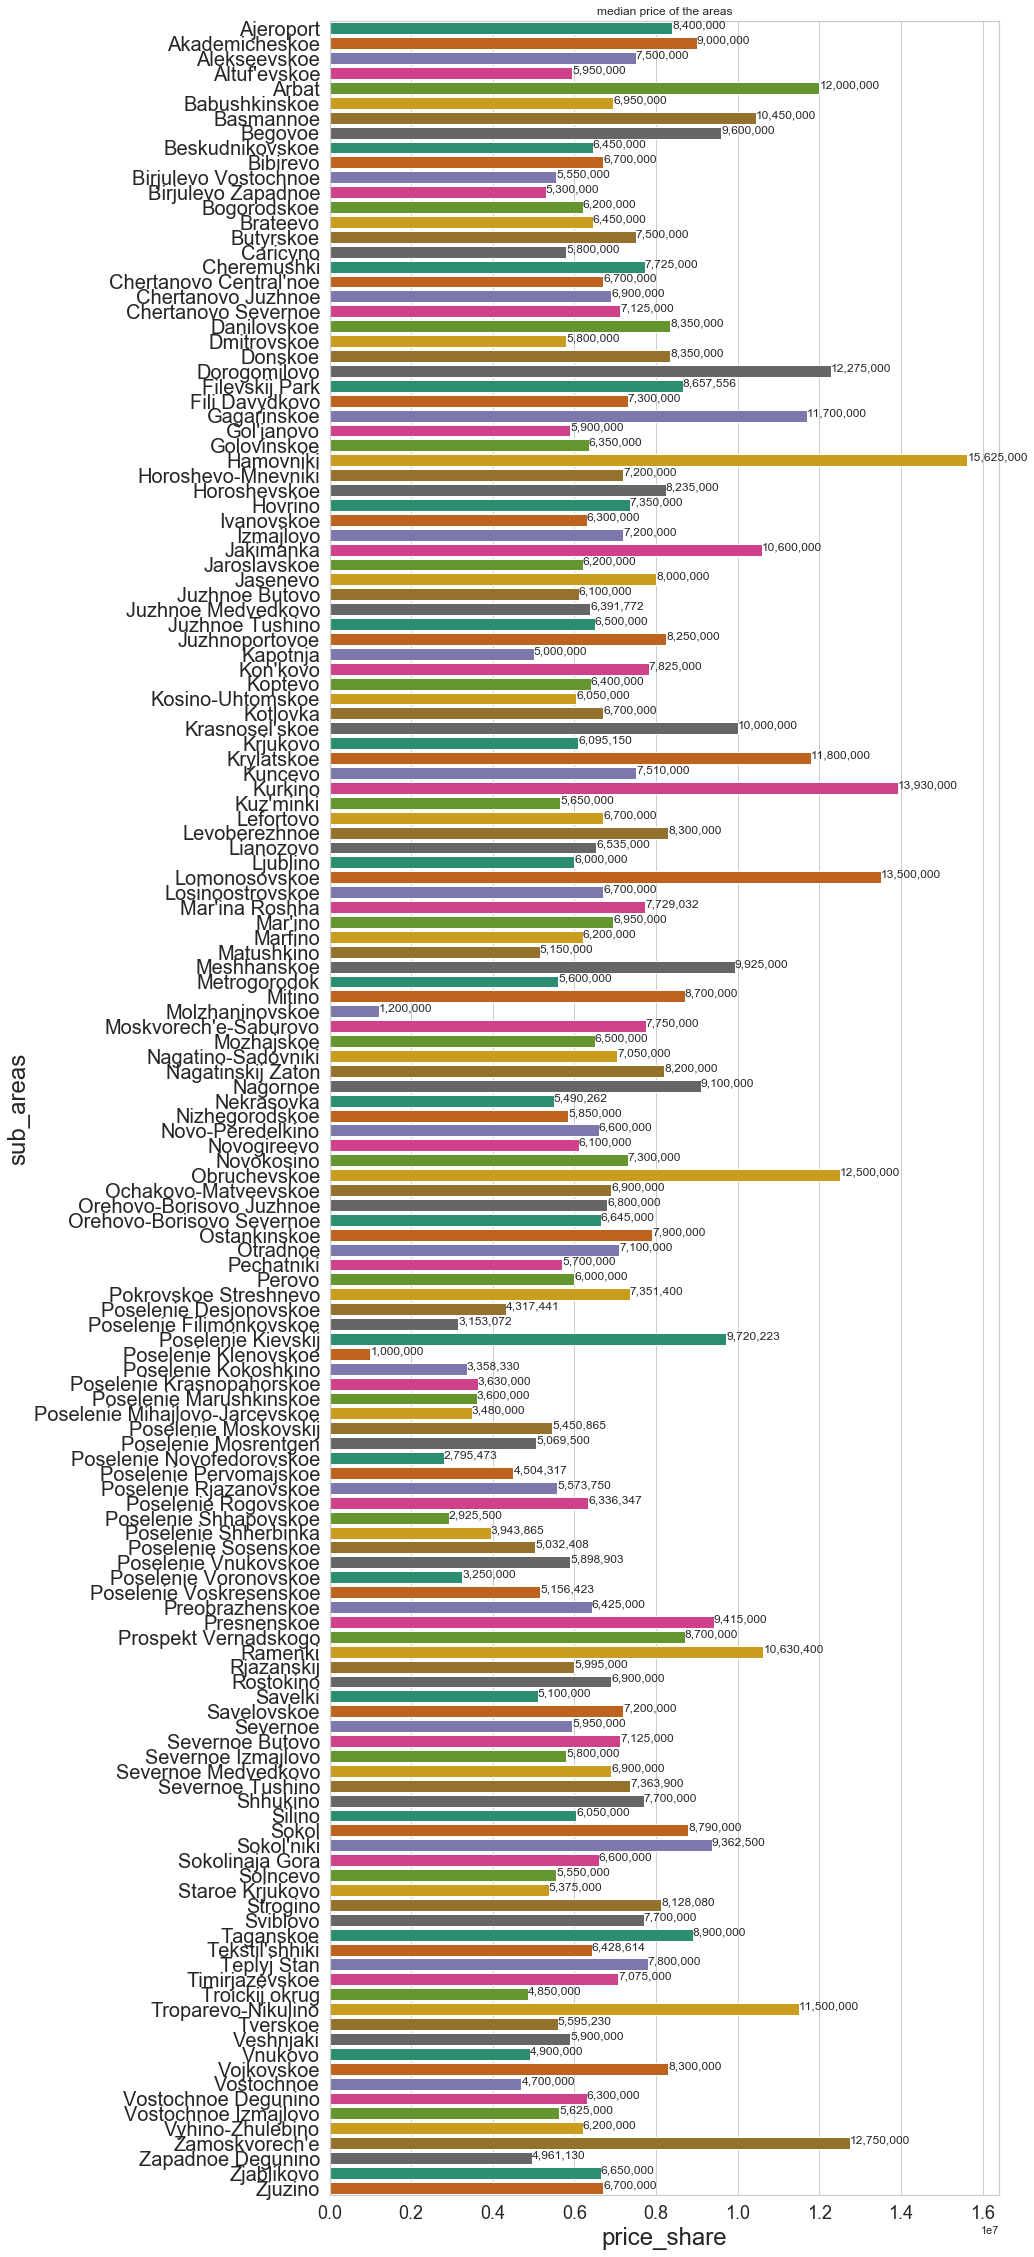

In [87]:
#https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib
fig, ax= plt.subplots(figsize =(12,40))
sns.set_style('whitegrid')
sns.set_context('notebook') 
grouped_df = df.groupby('sub_area')['price_doc'].aggregate(np.median).reset_index()


ax=sns.barplot(palette="Dark2",ax=ax, x='price_doc',y='sub_area',data=grouped_df,orient='H')
total=len(df['sub_area'])
plt.fontsize =(35)
for p in ax.patches:
    percentage ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =0,fontsize =18)
plt.yticks(rotation =0,fontsize =20)

plt.title("median price of the areas")
plt.xlabel ('price_share',fontsize =24)
plt.ylabel ('sub_areas',fontsize =24)

plt.show ()

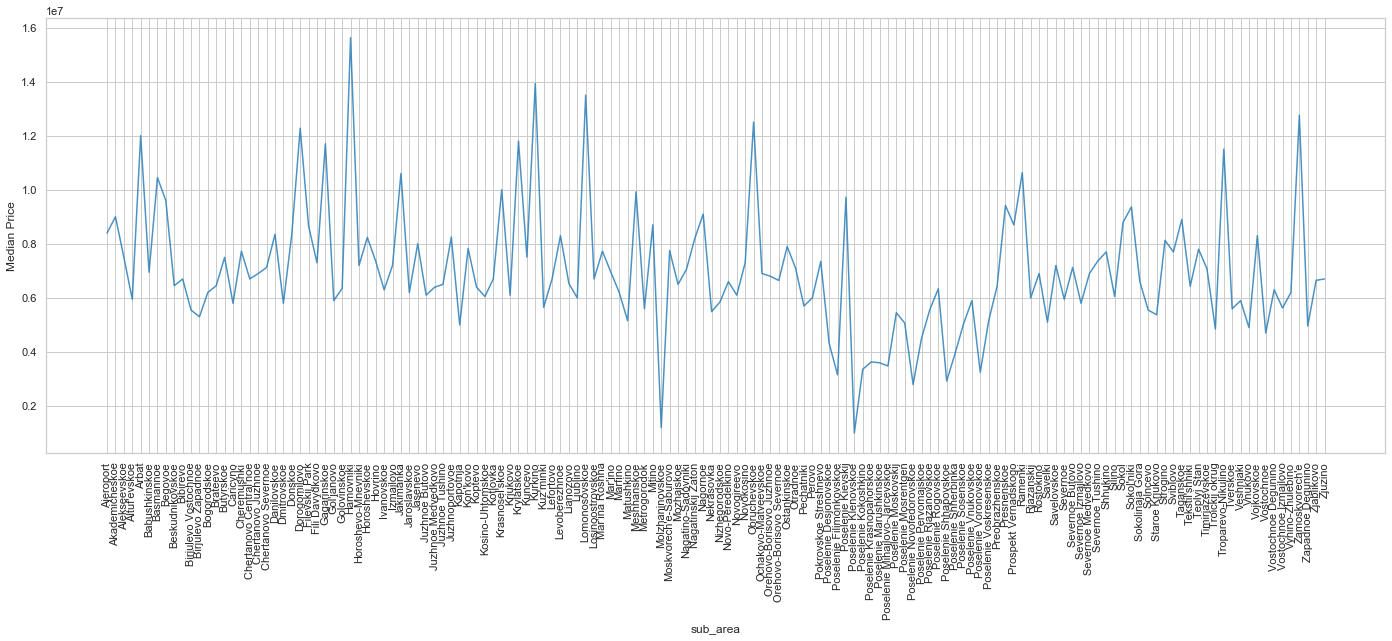

In [583]:
grouped_df = df.groupby('sub_area')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(24,8))
sns.lineplot(grouped_df.sub_area.values, grouped_df.price_doc.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('sub_area', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

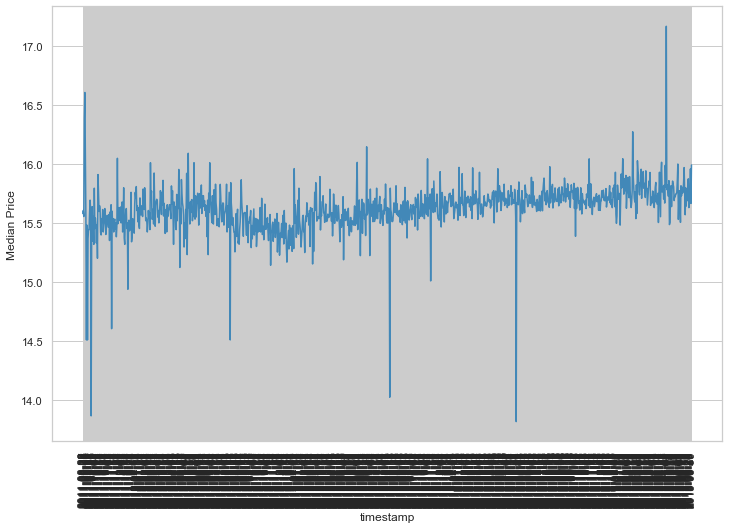

In [1121]:
grouped_df = df.groupby('timestamp')['target'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(grouped_df.timestamp.values, np.log(grouped_df.target.values), alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [980]:
#the prices seems to go_up as the time progresses we need to zoom in and see the plots for each year
# we will divide the years into 2011, to 2015

In [1009]:


df['timestamp']=df['timestamp'].astype(str)
df['year']=df['timestamp'].apply(lambda x: x[:4])
df['year'].value_counts()

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

In [1010]:
201208-201108

100

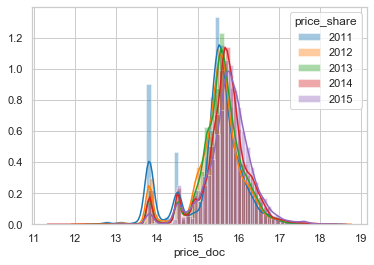

In [1012]:
y1=df.loc[df.year=='2011' ,'price_doc']
y2=df.loc[df.year=='2012','price_doc']
y3=df.loc[df.year=='2013','price_doc']
y4=df.loc[df.year=='2014','price_doc']
y5=df.loc[df.year=='2015','price_doc']
sns.distplot(np.log(y1))
sns.distplot(np.log(y2))
sns.distplot(np.log(y3))
sns.distplot(np.log(y4))
sns.distplot(np.log(y5))
plt.legend(title='price_share', loc='upper right', labels=['2011','2012','2013','2014','2015'])
plt.show()





In [1013]:
#the distribution of prices seems to be same every where

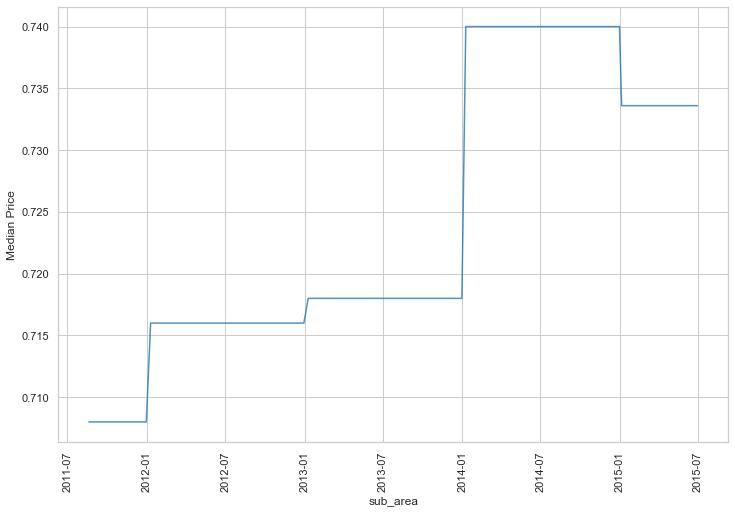

In [382]:
grouped_df = df.groupby('timestamp')['employment'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(grouped_df.timestamp.values, grouped_df.employment.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('sub_area', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# As the time progress employenet gorwn which seems the prices also mmight have raised

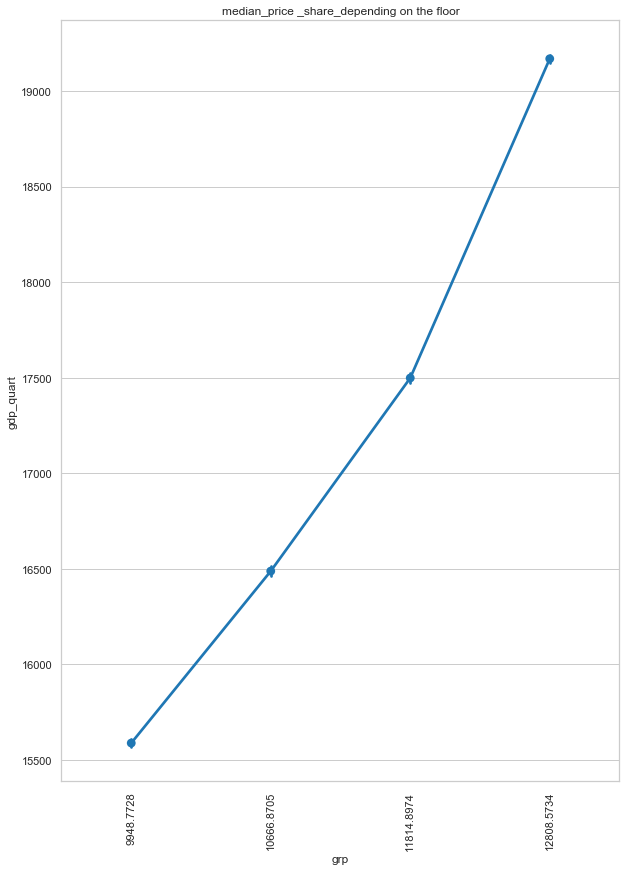

In [942]:
sns.set_style('whitegrid')
sns.set_context('notebook') 
plt.figure(figsize=(10,14))

grouped_df = df.groupby('gdp_quart')['grp'].aggregate(np.median).reset_index()


sns.pointplot( y='gdp_quart',x='grp',data=df)
plt.xticks(rotation='vertical')
plt.title("median_price _share_depending on the floor")
plt.show()





#based on this some of the misssing values are made imputed with max_value
#and some values are imputed with min _value
#and some imputed with median values

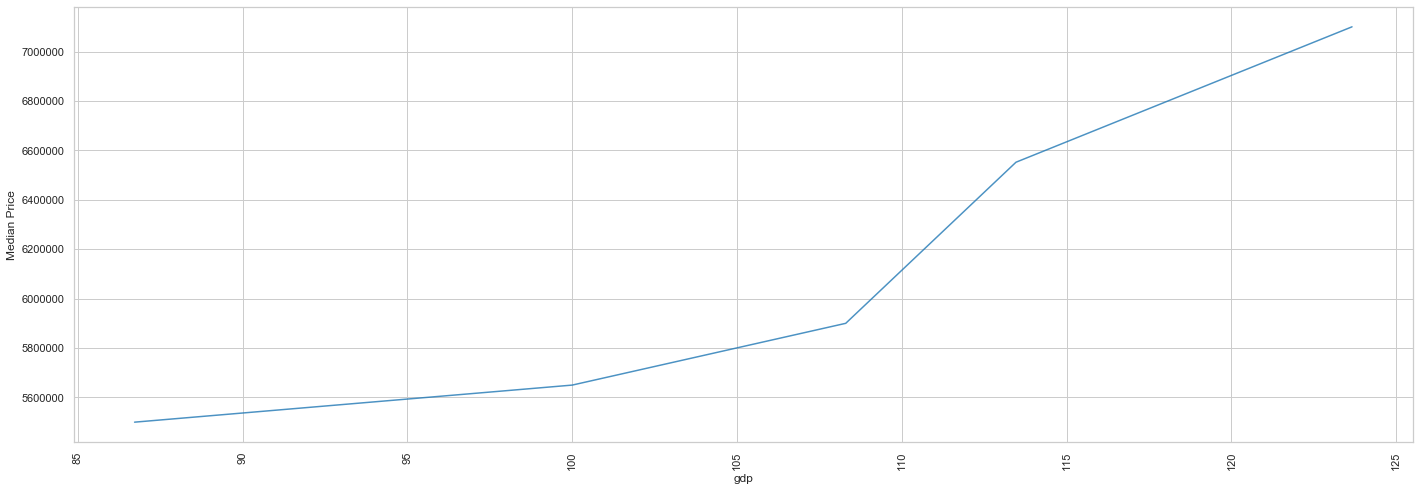

In [1015]:
## GDP
grouped_df = df.groupby('gdp_deflator')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(24,8))
sns.lineplot(grouped_df.gdp_deflator.values, grouped_df.price_doc.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('gdp', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# deflator_shows positve trend towards as rise in PRICE

In [5]:
df=df_mf_train

In [70]:
df.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'provision_retail_space_modern_sqm', 'turnover_catering_per_cap',
       'theaters_viewers_per_1000_cap', 'seats_theather_rfmin_per_100000_cap',
       'museum_visitis_per_100_cap', 'bandwidth_sports',
       'population_reg_sports_share', 'students_reg_sports_share',
       'apartment_build', 'apartment_fund_sqm'],
      dtype='object', length=391)

In [75]:
mdf=df[['oil_urals','gdp_quart','gdp_quart_growth','cpi','ppi','gdp_deflator','balance_trade','balance_trade_growth','usdrub','eurrub','brent','gdp_annual','gdp_annual_growth','price_doc']]

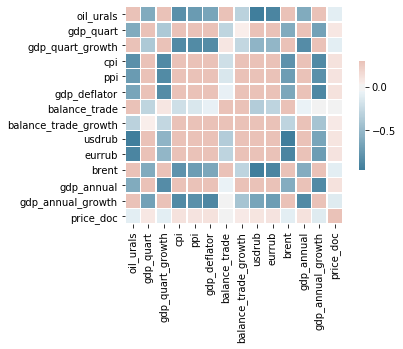

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mdf.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [589]:
x=['oil_urals','gdp_quart','gdp_quart_growth','cpi','ppi','gdp_deflator','balance_trade','balance_trade_growth','usdrub','eurrub','brent','gdp_annual','gdp_annual_growth']
y='price_doc'
from scipy import stats
for i in mf.columns[1:]:
    print(i,":",stats.spearmanr(df[i],df[y])[0])

oil_urals : -0.12457022527032294
gdp_quart : 0.11093017729888487
gdp_quart_growth : -0.1317738808402033
cpi : 0.16829853202703746
ppi : 0.15337406247362295
gdp_deflator : 0.16958339899676464
balance_trade : 0.009903718156698627
balance_trade_growth : 0.08268244767421085
usdrub : 0.1680316693664656
eurrub : 0.1634175177424076
brent : -0.10735199319152053
net_capital_export : -0.00867815729193307
gdp_annual : 0.16958339899676464
gdp_annual_growth : -0.16958339899676464
average_provision_of_build_contract : 0.11248632235035608
average_provision_of_build_contract_moscow : 0.06653553971058189
rts : -0.15118146713933245
micex : 0.04545053123450357
micex_rgbi_tr : -0.15853462450184627
micex_cbi_tr : 0.14363914187935686
deposits_value : 0.16536671219383564
deposits_growth : -0.03245292209604624
deposits_rate : 0.03213318145990272
mortgage_value : 0.018958388926641593
mortgage_growth : -0.05810677886928097
mortgage_rate : 0.02894993515323096
grp : nan
grp_growth : nan
income_per_cap : 0.0431696

# before-preprocess modelling just filled values with 0


In [82]:
df_mf_train.fillna(0,axis=0)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,0.0,10805.0,0.0,0.45888,0.0,463938.0,0.00,0.00,0.0,234576.9
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,0.0,10805.0,0.0,0.45888,0.0,463938.0,0.00,0.00,0.0,234576.9
30468,30471,2015-06-30,45,0.0,10.0,20.0,1.0,0.0,1.0,1.0,...,0.0,10805.0,0.0,0.45888,0.0,463938.0,0.00,0.00,0.0,234576.9
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,0.0,10805.0,0.0,0.45888,0.0,463938.0,0.00,0.00,0.0,234576.9


In [ ]:
#DATA_PREPROCESSING_WILL_BE_CONTINUED_IN_YOUR_NEXT_BOOK